<a href="https://colab.research.google.com/github/PawelPolejowski/nowerepozytorium/blob/main/Projekt_klasyfikacje_modele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


In [53]:
attrition = pd.read_csv('attrition.csv') 

In [54]:
attrition["Attrition"] = attrition["Attrition"].replace({"No": 0, "Yes": 1})
attrition["Attrition"] = attrition["Attrition"].replace([np.inf, -np.inf, np.nan], -1)
attrition["Attrition"] = attrition["Attrition"].astype(int)


In [55]:
attrition

,EmployeeNumber,Attrition
0,104,0
1,1638,0
2,164,0
3,395,0
4,53,0
...,...,...
4444,7975,1
4445,7976,1
4446,7977,1
4447,7978,1


In [56]:
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')

In [57]:
merged_df = pd.merge(df1, df2, on="EmployeeNumber")
merged_df

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4445,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4446,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2104.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0
4447,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2104.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


In [58]:
unique_BusinessTravel = merged_df ['BusinessTravel'].unique()
unique_Department = merged_df ['Department'].unique()
unique_Age = merged_df ['Age'].unique()
unique_TotalWorkingYears = merged_df ['TotalWorkingYears'].unique()

unique_EducationField = merged_df ['EducationField'].unique()

merged_df = merged_df.drop(merged_df[merged_df['TotalWorkingYears'] > 1000].index)
merged_df = merged_df.drop(merged_df[merged_df['YearsAtCompany'] > 1000].index)
merged_df = merged_df.drop(merged_df[merged_df['YearsInCurrentRole'] > 1000].index)
merged_df = merged_df.drop(merged_df[merged_df['YearsSinceLastPromotion'] > 1000].index)
merged_df = merged_df.drop(merged_df[merged_df['YearsWithCurrManager'] > 1000].index)

In [59]:
unique_EducationField

array(['Life Sciences', 'Medical', 'Other', 'Technical Degree',
       'Marketing', 'Human Resources'], dtype=object)

In [60]:
merged_df["BusinessTravel"] = merged_df["BusinessTravel"].replace({"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2})
merged_df["BusinessTravel"] = merged_df["BusinessTravel"].replace([np.inf, -np.inf, np.nan], -1)
merged_df["BusinessTravel"] = merged_df["BusinessTravel"].astype(int)

In [64]:
np.sort(unique_Age)

array([  18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
         45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
         54.,   55.,   56.,   57.,   58.,   59.,   60., 1107., 1126.,
       1136., 1141., 1189., 1423., 1530., 1541., 1578., 1775., 1788.,
       1915., 2012., 2095., 2186., 2242., 2275., 2280., 2404., 2423.,
       2459., 2530., 2637., 2641., 2667., 2698., 2852., 2882., 2888.,
       2972., 2982., 2993., 3095., 3147., 3226., 3281., 3388., 3437.,
       3469., 3626., 3628., 3636., 3871., 4130., 4137., 4322., 4328.,
       4330., 4454., 4510., 4515., 4553., 4558., 4591., 4744., 4805.,
       4834., 4880., 4935., 4973., 4985., 4988., 5007., 5034., 5116.,
       5215., 5257., 5377., 5402., 5565., 5582., 5614., 5672., 5852.,
       5933., 5959., 5997., 6025., 6032., 6210., 6287., 6399., 6429.,
       6506., 6510.,

In [65]:
merged_df = merged_df.drop(merged_df[merged_df['Age'] > 60].index)
merged_df

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,1,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,1,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,1,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,1,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,1,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4431,7962,55.0,1,725.0,Research & Development,2.0,3.0,Medical,1.0,4.0,Male,78.0,3.0,5.0,Manager,1.0,Married,19859.0,21199.0,5.0,Y,Yes,13.0,3.0,4.0,80.0,1.0,24.0,2.0,3.0,5.0,2.0,1.0,4.0,Yes,238308.0
4432,7963,55.0,1,725.0,Research & Development,2.0,3.0,Medical,1.0,4.0,Male,78.0,3.0,5.0,Manager,1.0,Married,19859.0,21199.0,5.0,Y,Yes,13.0,3.0,4.0,80.0,1.0,24.0,2.0,3.0,5.0,2.0,1.0,4.0,No,238308.0
4446,7977,44.0,0,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2104.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0
4447,7978,44.0,0,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2104.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


<ipython-input-66-9de3f8ac9c00>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


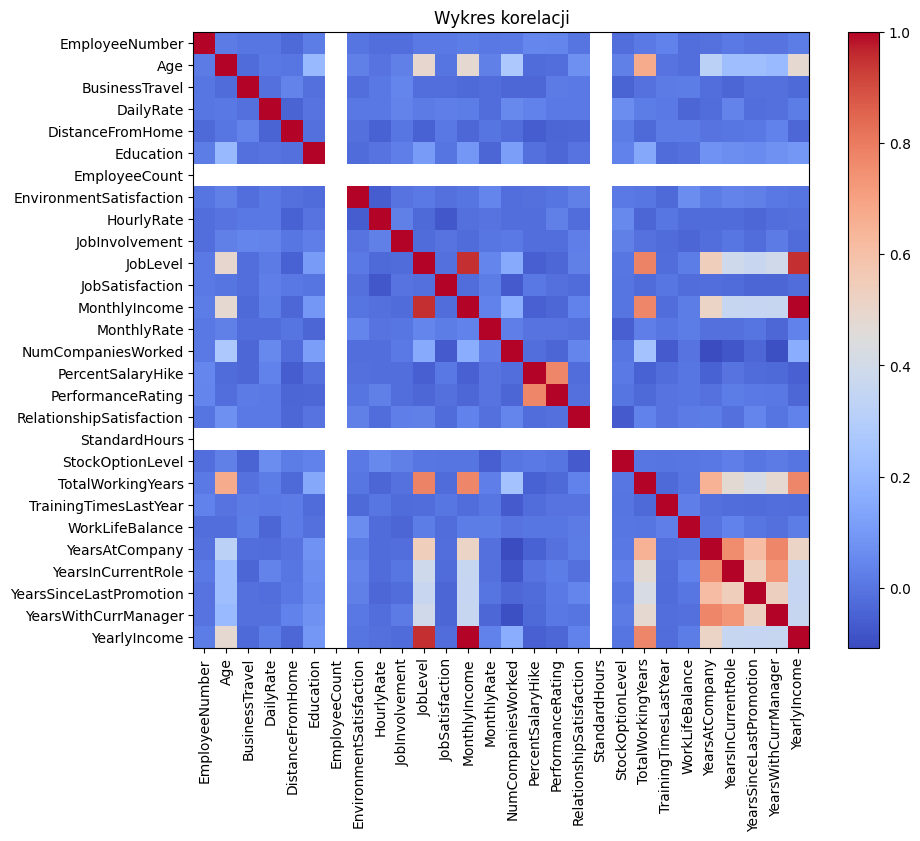

In [66]:

# Zakładając, że masz DataFrame o nazwie 'merged_df'

# Obliczenie macierzy korelacji
correlation_matrix = merged_df.corr()

# Wygenerowanie wykresu korelacji
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Wykres korelacji')
plt.show()


In [67]:
merged_attrition_df = pd.merge(merged_df, attrition, on="EmployeeNumber")
# Zakładając, że masz DataFrame o nazwie 'merged_attrition_df'

# Usunięcie kolumn 'Department', 'EducationField' i 'Attrition_x'
merged_attrition_df = merged_attrition_df.drop(['Department', 'EducationField', 'Attrition_x', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'], axis=1)
merged_attrition_df.set_index("EmployeeNumber", inplace=True)
merged_attrition_df.sort_index(inplace=True)
merged_attrition_df




,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,Attrition_y
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41.0,1,1102.0,1.0,2.0,1.0,2.0,94.0,3.0,2.0,4.0,5993.0,19479.0,8.0,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,71916.0,1
2,49.0,2,279.0,8.0,1.0,1.0,3.0,61.0,2.0,2.0,2.0,5130.0,24907.0,1.0,23.0,4.0,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0,61560.0,0
7,27.0,1,591.0,2.0,1.0,1.0,1.0,40.0,3.0,1.0,2.0,3468.0,16632.0,9.0,12.0,3.0,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0,41616.0,0
8,32.0,2,1005.0,2.0,2.0,1.0,4.0,79.0,3.0,1.0,4.0,3068.0,11864.0,0.0,13.0,3.0,3.0,80.0,0.0,8.0,2.0,2.0,7.0,7.0,3.0,6.0,36816.0,0
11,30.0,1,1358.0,24.0,1.0,1.0,4.0,67.0,3.0,1.0,3.0,2693.0,13335.0,1.0,22.0,4.0,2.0,80.0,1.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,32316.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100142,35.0,0,208.0,8.0,4.0,1.0,3.0,52.0,3.0,2.0,3.0,4148.0,12250.0,1.0,12.0,3.0,4.0,80.0,1.0,15.0,5.0,3.0,14.0,11.0,2.0,9.0,49776.0,-1
100143,41.0,1,582.0,28.0,4.0,1.0,1.0,60.0,2.0,4.0,2.0,13570.0,5640.0,0.0,23.0,4.0,3.0,80.0,1.0,21.0,3.0,3.0,20.0,7.0,0.0,10.0,162840.0,-1
100144,42.0,1,1396.0,6.0,3.0,1.0,3.0,83.0,3.0,3.0,1.0,13348.0,14842.0,9.0,13.0,3.0,2.0,80.0,1.0,18.0,3.0,4.0,13.0,7.0,5.0,7.0,160176.0,-1


In [68]:
import pandas as pd

# Zakładając, że masz DataFrame 'merged_attrition_df'

# Przekształcenie wartości kolumny 'TotalWorkingYears' na liczby rzeczywiste
unique_values = merged_attrition_df['TotalWorkingYears'].unique()
unique_values_formatted = [format(x, '.15g') for x in unique_values]

# Posortowanie wartości od najniższych do najwyższych
sorted_values = sorted(unique_values_formatted, key=float)

# Wyświetlenie posortowanych wartości
print(sorted_values)

import pandas as pd

# Zakładając, że masz DataFrame 'merged_attrition_df'

# Usunięcie wierszy z wartością powyżej 1015 w kolumnie 'TotalWorkingYears'
merged_attrition_df = merged_attrition_df.drop(merged_attrition_df[merged_attrition_df['TotalWorkingYears'] > 1015].index)

# Assuming 'merged_attrition_df' is your DataFrame


# # Sort the DataFrame by the index
# merged_attrition_df.sort_index(inplace=True)

# # Set the "EmployeeNumber" column as the index
# merged_attrition_df.set_index("EmployeeNumber", inplace=True)






# Wyświetlenie zaktualizowanego DataFrame
merged_attrition_df



['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '40']


,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,Attrition_y
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41.0,1,1102.0,1.0,2.0,1.0,2.0,94.0,3.0,2.0,4.0,5993.0,19479.0,8.0,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,71916.0,1
2,49.0,2,279.0,8.0,1.0,1.0,3.0,61.0,2.0,2.0,2.0,5130.0,24907.0,1.0,23.0,4.0,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0,61560.0,0
7,27.0,1,591.0,2.0,1.0,1.0,1.0,40.0,3.0,1.0,2.0,3468.0,16632.0,9.0,12.0,3.0,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0,41616.0,0
8,32.0,2,1005.0,2.0,2.0,1.0,4.0,79.0,3.0,1.0,4.0,3068.0,11864.0,0.0,13.0,3.0,3.0,80.0,0.0,8.0,2.0,2.0,7.0,7.0,3.0,6.0,36816.0,0
11,30.0,1,1358.0,24.0,1.0,1.0,4.0,67.0,3.0,1.0,3.0,2693.0,13335.0,1.0,22.0,4.0,2.0,80.0,1.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,32316.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100142,35.0,0,208.0,8.0,4.0,1.0,3.0,52.0,3.0,2.0,3.0,4148.0,12250.0,1.0,12.0,3.0,4.0,80.0,1.0,15.0,5.0,3.0,14.0,11.0,2.0,9.0,49776.0,-1
100143,41.0,1,582.0,28.0,4.0,1.0,1.0,60.0,2.0,4.0,2.0,13570.0,5640.0,0.0,23.0,4.0,3.0,80.0,1.0,21.0,3.0,3.0,20.0,7.0,0.0,10.0,162840.0,-1
100144,42.0,1,1396.0,6.0,3.0,1.0,3.0,83.0,3.0,3.0,1.0,13348.0,14842.0,9.0,13.0,3.0,2.0,80.0,1.0,18.0,3.0,4.0,13.0,7.0,5.0,7.0,160176.0,-1


In [69]:
unique_Attrition_y= merged_attrition_df['Attrition_y'].unique()
merged_attrition_df = merged_attrition_df[merged_attrition_df['Attrition_y'] != -1]
unique_Attrition_y = merged_attrition_df ['Attrition_y'].unique()
merged_attrition_df = merged_attrition_df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))

unique_Attrition_y



array([1, 0])

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Zakładając, że masz DataFrame o nazwie 'merged_attrition_df'

# Wczytanie cech (features) ze wszystkich kolumn, z wyjątkiem kolumny 'Attrition_y'
features = merged_attrition_df.drop('Attrition_y', axis=1)

# Wczytanie klasy (class) z kolumny 'Attrition_y'
target = merged_attrition_df['Attrition_y']

# Podział danych na zbiór treningowy i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)




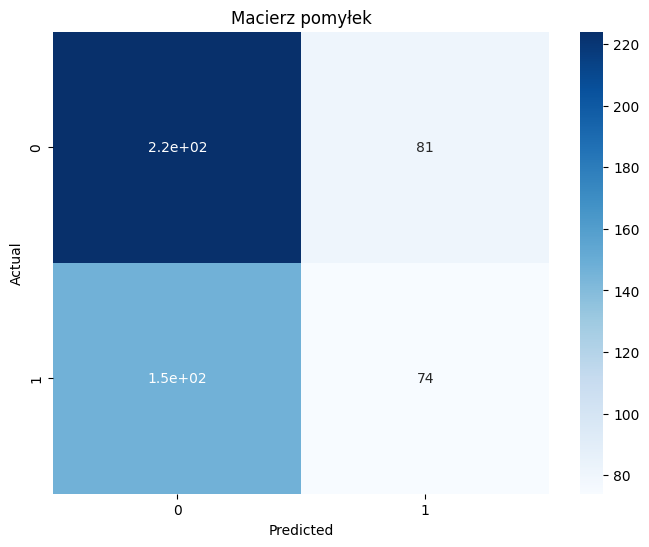

In [76]:
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Zakładając, że masz DataFrame 'features' jako cechy i 'target' jako klasę


# Tworzenie i dopasowanie modelu KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9, metric='chebyshev')
knn.fit(X_train, y_train)

# Predykcja na danych testowych
pred = knn.predict(X_test)

# Tworzenie macierzy pomyłek
cm = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])

# Wyświetlenie macierzy pomyłek za pomocą heatmapy
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Macierz pomyłek')
plt.show()


In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='weighted'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [78]:
import pandas as pd

# Zakładając, że masz DataFrame o nazwie 'merged_attrition_df'

# Zastosowanie konwersji wartości w notacji naukowej na liczby rzeczywiste dla całego DataFrame
merged_attrition_df = merged_attrition_df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))

# Wyświetlenie DataFrame po konwersji wartości


In [79]:
print_results(calculate_metrics(y_test, pred), 'kNN')

Results for kNN
----
  Accuracy:  0.5665399239543726
  Precision: 0.5506855909041468
  Recall:    0.5665399239543726
  F1 score:  0.5496569186633471
  Mislabeled 228 out of 526




In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pylab as plt

# Specify L1 regularization
knn = KNeighborsClassifier()

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(knn, {'n_neighbors':[3, 5, 7, 9], 'metric':['chebyshev', 'minkowski', 'manhattan', 'euclidean']})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)



Best CV params {'metric': 'chebyshev', 'n_neighbors': 9}


In [81]:
unique_Attrition_y= merged_attrition_df['Attrition_y'].unique()
merged_attrition_df = merged_attrition_df[merged_attrition_df['Attrition_y'] != -1]
unique_Attrition_y = merged_attrition_df ['Attrition_y'].unique()
merged_attrition_df = merged_attrition_df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))

unique_Attrition_y



array([1, 0])

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Zakładając, że masz DataFrame o nazwie 'merged_attrition_df'

# Wczytanie cech (features) ze wszystkich kolumn, z wyjątkiem kolumny 'Attrition_y'
features = merged_attrition_df.drop('Attrition_y', axis=1)

# Wczytanie klasy (class) z kolumny 'Attrition_y'
target = merged_attrition_df['Attrition_y']

# Podział danych na zbiór treningowy i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


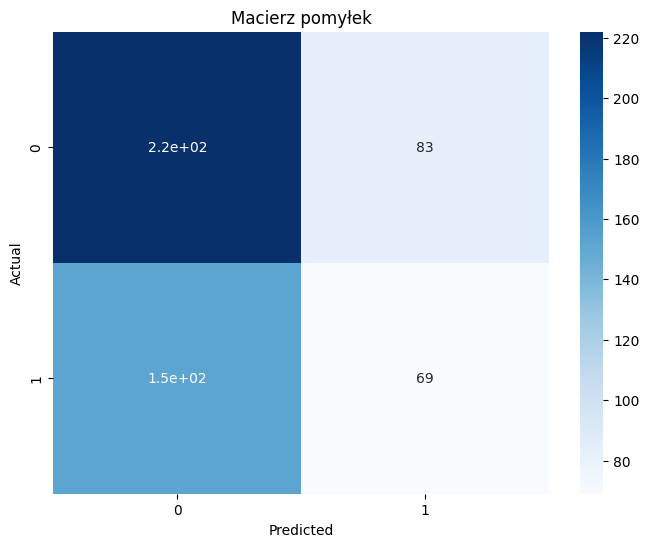

In [83]:
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Zakładając, że masz DataFrame 'features' jako cechy i 'target' jako klasę


# Tworzenie i dopasowanie modelu KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9, metric='minkowski')
knn.fit(X_train, y_train)

# Predykcja na danych testowych
pred = knn.predict(X_test)

# Tworzenie macierzy pomyłek
cm = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])

# Wyświetlenie macierzy pomyłek za pomocą heatmapy
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Macierz pomyłek')
plt.show()


In [84]:
from sklearn.svm import SVC

# Train a linear SVM
svm = SVC(C = 10, kernel="rbf")
svm.fit(X_train,y_train)
pred = svm.predict(X_test)
print_results(calculate_metrics(y_test, pred), 'svm')

Results for svm
----
  Accuracy:  0.6102661596958175
  Precision: 0.6334707527415
  Recall:    0.6102661596958175
  F1 score:  0.5259860656487882
  Mislabeled 205 out of 526




In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create an instance of the DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Create GridSearchCV with the classifier and parameters
searcher = GridSearchCV(classifier, parameters)
searcher.fit(X_train, y_train)

# Make predictions on the test data using the best estimator found by GridSearchCV
pred = searcher.predict(X_test)

searcher.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'splitter': 'random'}

Results for DecisionTreeClassifier
----
  Accuracy:  0.5684410646387833
  Precision: 0.5275204393022079
  Recall:    0.5684410646387833
  F1 score:  0.48986841920754504
  Mislabeled 227 out of 526




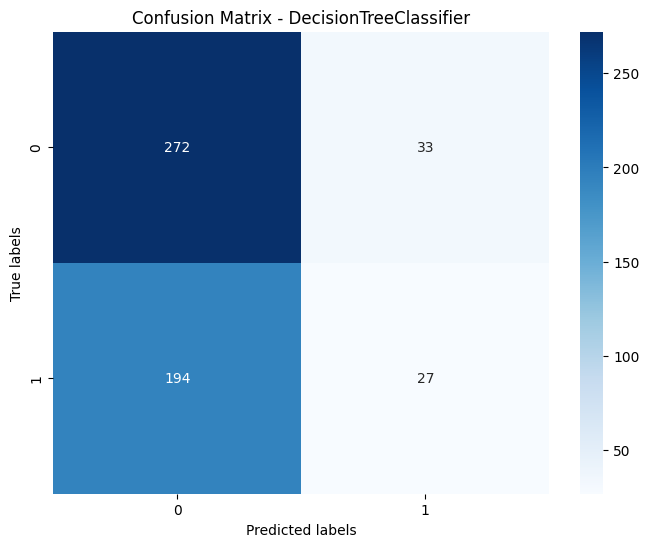

              precision    recall  f1-score   support

           0       0.58      0.89      0.71       305
           1       0.45      0.12      0.19       221

    accuracy                           0.57       526
   macro avg       0.52      0.51      0.45       526
weighted avg       0.53      0.57      0.49       526



In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create a DecisionTreeClassifier with specified parameters
CNB = DecisionTreeClassifier(random_state=0, 
                             criterion='entropy', 
                             splitter='random',
                             max_depth=6,
                             max_features='sqrt'
                             )

# Train the DecisionTreeClassifier
CNB.fit(X_train, y_train)

# Make predictions on the test data
pred = CNB.predict(X_test)

# Calculate metrics
metrics = calculate_metrics(y_test, pred)

# Print the results
print_results(metrics, 'DecisionTreeClassifier')

# Plot the confusion matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - DecisionTreeClassifier')
plt.show()

# Plot the classification report
report = classification_report(y_test, pred)
print(report)

In [87]:
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

# Generate synthetic dataset
X_train, y_train = make_classification(n_samples=1000, n_features=27, n_informative=2,
                                       n_redundant=0, random_state=0, shuffle=False)

# Create a BaggingClassifier instance
bagging = BaggingClassifier()

# Define the parameter grid for GridSearchCV
parameters = {
    'base_estimator': [None],  # Set the base estimator to None to use the default base estimator (DecisionTreeClassifier)
    'n_estimators': [50, 100, 200],
    'max_samples': [1.0],
    'max_features': [1.0],
    'bootstrap': [True],
    'bootstrap_features': [False]
}

# Create GridSearchCV with the classifier and parameters
searcher = GridSearchCV(bagging, parameters)

# Fit the GridSearchCV to the training data
searcher.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters:", searcher.best_params_)


Best parameters: {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


Results for BaggingClassifier:
Accuracy: 0.5494
Precision: 0.5212
Recall: 0.5494
F1 Score: 0.5159


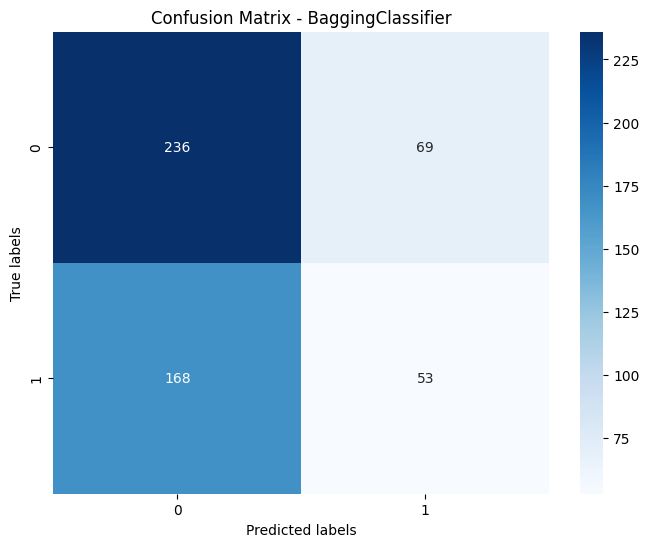

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.77      0.67       305
           1       0.43      0.24      0.31       221

    accuracy                           0.55       526
   macro avg       0.51      0.51      0.49       526
weighted avg       0.52      0.55      0.52       526



In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split



# Create a BaggingClassifier instance
bagging = BaggingClassifier(base_estimator= None, bootstrap= True, bootstrap_features= False, max_features= 1.0, max_samples= 1.0, n_estimators= 100)

# Fit the model to the training data
bagging.fit(X_train, y_train)

# Make predictions on the testing data
pred = bagging.predict(X_test)

# Define the calculate_metrics function
def calculate_metrics(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    return accuracy, precision, recall, f1

# Define the print_results function
def print_results(metrics, classifier_name):
    accuracy, precision, recall, f1 = metrics
    print(f"Results for {classifier_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Calculate and print the metrics
metrics = calculate_metrics(y_test, pred)
print_results(metrics, 'BaggingClassifier')

# Plot the confusion matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - BaggingClassifier')
plt.show()

# Plot the classification report
report = classification_report(y_test, pred)
print("Classification Report:\n", report)

In [89]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Generate synthetic dataset
X_train, y_train = make_classification(n_samples=1000, n_features=13, n_informative=2,
                                       n_redundant=0, random_state=0, shuffle=False)

# Create a RandomForestClassifier instance
rf = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV with the classifier and parameters
searcher = GridSearchCV(rf, parameters)

# Fit the GridSearchCV to the training data
searcher.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters:", searcher.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


Results for RandomForestClassifier:
Accuracy: 0.9240
Precision: 0.9294
Recall: 0.9240
F1 Score: 0.9238


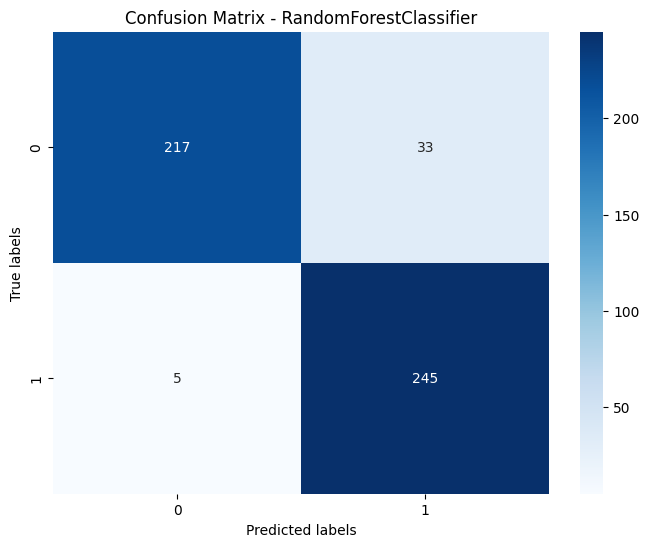

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       250
           1       0.88      0.98      0.93       250

    accuracy                           0.92       500
   macro avg       0.93      0.92      0.92       500
weighted avg       0.93      0.92      0.92       500



In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Generate synthetic dataset
X_train, y_train = make_classification(n_samples=1000, n_features=13, n_informative=2,
                                       n_redundant=0, random_state=0, shuffle=False)

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 50)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Generate the testing dataset (assuming X_test and y_test are defined separately)
X_test, y_test = make_classification(n_samples=500, n_features=13, n_informative=2,
                                     n_redundant=0, random_state=1, shuffle=False)

# Make predictions on the testing data
pred = rf.predict(X_test)

# Define the calculate_metrics function
def calculate_metrics(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    return accuracy, precision, recall, f1

# Define the print_results function
def print_results(metrics, classifier_name):
    accuracy, precision, recall, f1 = metrics
    print(f"Results for {classifier_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Calculate and print the metrics
metrics = calculate_metrics(y_test, pred)
print_results(metrics, 'RandomForestClassifier')

# Plot the confusion matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - RandomForestClassifier')
plt.show()

# Plot the classification report
report = classification_report(y_test, pred)
print("Classification Report:\n", report)


In [92]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# Generate a random dataset (replace with your own data)
X_train, y_train = make_classification(n_samples=1000, n_features=13, n_informative=2,
                                       n_redundant=0, random_state=0, shuffle=False)

# Create the AdaBoostClassifier
adaboost = AdaBoostClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(adaboost, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best Score: 0.95


Results for AdaBoostClassifier:
Accuracy: 0.9160
Precision: 0.9238
Recall: 0.9160
F1 Score: 0.9156


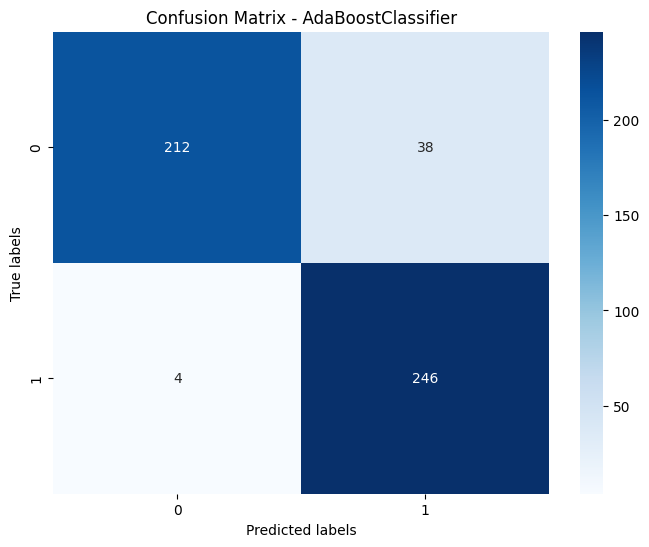

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91       250
           1       0.87      0.98      0.92       250

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Generate synthetic dataset
X_train, y_train = make_classification(n_samples=1000, n_features=13, n_informative=2,
                                       n_redundant=0, random_state=0, shuffle=False)

# Create an AdaBoostClassifier instance
AdaBoost = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100)

# Fit the model to the training data
AdaBoost.fit(X_train, y_train)

# Generate the testing dataset (assuming X_test and y_test are defined separately)
# X_test, y_test = ...

# Make predictions on the testing data
pred = AdaBoost.predict(X_test)

# Define the calculate_metrics function
def calculate_metrics(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    return accuracy, precision, recall, f1

# Define the print_results function
def print_results(metrics, classifier_name):
    accuracy, precision, recall, f1 = metrics
    print(f"Results for {classifier_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Calculate and print the metrics
metrics = calculate_metrics(y_test, pred)
print_results(metrics, 'AdaBoostClassifier')

# Plot the confusion matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - AdaBoostClassifier')
plt.show()

# Plot the classification report
report = classification_report(y_test, pred)
print("Classification Report:\n", report)